# This notebook is a combination of different notebooks to get to know the dataset

First step, as always, is to import the required libraries

In [1]:
# import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

set the parameters for the graph to be uniform

In [2]:
plt.rcParams['figure.figsize'] = 4, 2
plt.rcParams['figure.dpi'] = 150
palette = ['#43948c', '#36a097', '#28aea2', '#1bbbad', '#0dc9b8']
hue_palette = ['#43948c', '#3CB371']

Then we import the dataset

In [8]:
df = pd.read_csv('../data/review_1819_eng.csv')

Let' get a first impression of the dataset

In [11]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,2018
1,lUUhg8ltDsUZ9h0xnwY4Dg,RreNy--tOmXMl1en0wiBOg,cPepkJeRMtHapc_b2Oe_dw,4.0,1,0,1,I was really between 3 and 4 stars for this on...,2018-07-17 03:30:07,2018
2,JBWZmBy69VMggxj3eYn17Q,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5.0,0,0,0,My boyfriend and I tried this deli for the fir...,2018-08-23 21:39:38,2018
3,A4n4YaE-owOVgTQcrVqHUw,S7bjj-L07JuRr-tpX1UZLw,I6L0Zxi5Ww0zEWSAVgngeQ,4.0,0,0,0,The cafe was extremely cute. We came at 8am an...,2018-07-07 20:50:12,2018
4,4KpIldEM-tdnrJLqYzRfZQ,Z5j9Xw_G0c7M2b1-iS67wg,HTqXI5S2XcSlh_ylx9sE6g,5.0,1,1,1,I've only had the cannolis here but they are a...,2018-03-23 14:35:33,2018


So the data consists of a singular review_id, then a user_id and a business_id which match with other reviews of the same business or by the same user.   
More intersting for us is the star-rating. By checking for unique values, we can see, that we are dealing with the typical 5 star rating system that we expect from a dataset by Yelp. 

In [7]:
df.stars.unique()

array([3., 4., 5., 1., 2.])

the next three columns give us information as to how usefule/funny/cool the reviews has been seen by other users.

In [8]:
df.useful.unique()

array([  0,   1,   2,   4,   3,   5,   6,  11,   7,   8,  19,  16,   9,
        10,  27,  12,  29,  17,  21,  26,  13,  15,  20,  44,  14,  30,
        23,  25,  18,  46,  37,  47,  36,  42,  56,  38,  32,  35,  24,
        33,  28,  22,  54,  39,  68,  34,  41,  43,  73,  52,  31,  74,
        66,  45,  72,  48,  91,  82, 135,  40,  49, 118, 150,  59,  89,
        55,  50,  96,  71,  64,  86,  58, 109,  51, 120, 111, 160,  57,
       114, 123, 197,  85,  69,  87, 132, 168,  93, 176, 144, 127, 177,
       129, 187,  75,  70,  79, 182,  53, 217,  81,  60, 117, 158, 139,
        84, 181, 171, 192,  62, 163,  76,  67, 116,  95, 191,  61,  78,
        63, 105,  -1, 173,  92, 108, 113,  90,  77, 151,  97, 156,  65,
       101, 119, 148, 107, 102, 164, 155, 211, 103,  80, 196,  94, 140,
       124, 122, 131, 143, 134, 159,  88, 205, 136, 146,  98, 128, 166,
       152, 130, 227, 110, 142, 189, 147, 209, 115, 153, 162, 154, 137,
       170, 126, 133, 104, 325])

we can see, that these numbers differ greatly, and that even one review has a negative number of clicks?!

to be able to better work with these numbers, we're going to create a new column called clicked, which just shows, if a review has been clicked as useful by other user

In [9]:
df['clicked'] = df['useful'].apply(lambda x: 1 if x >= 1 else 0)
df.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,clicked
271297,2P5KjBwLw_PtKAwbWop3ng,DSoAeqVDHzhesI7g8pu0tA,9gOB2Tqc_LtvSRDxviFlHA,3.0,1,0,0,"Nice atmosphere, very bright and casual. I had...",2019-10-22 10:08:29,2019,1
622021,JPNRSa9BR6Usvz9Jcu8XTw,u8Dtaaw9Sqjk1A91jq-IYg,V9VLhHdSFpFi4yXFqVcVEA,2.0,0,0,0,"On a previous visit, the food and service was ...",2019-06-13 02:56:56,2019,0
1702440,McU8nf-HUp8SncW0ivf33A,05tcZ5Vfp39Q6IDgXy5P9A,oJvz2vU-skUNL5NbJOuAJw,5.0,1,0,0,The Perfect Fit is a wonderful tailor for alte...,2019-02-27 04:51:56,2019,1
345215,ks2XRQJP_d9vtZmOof-73A,-YEhEw6Uv5tbdUfZtm8Gsw,crgS4ogZEt2rYGwYVfeK2A,5.0,1,0,1,We've been here at least 20 times so far and o...,2018-06-07 20:55:15,2018,1
8150,iAJWXBWK6YqQT40VAMmKjQ,uNFjMftR-fAe_GRHzBfuQA,sway6xsRT_CUC6peK_Pyww,5.0,0,0,0,So before writing my review I read some of the...,2018-08-28 14:30:33,2018,0


Next comes the text of the review itself, with which we will work later in the cleaning process. for now let's just add a column to our dataframe with the length of the text, so that we will be able to get a first impression

In [10]:
# add a new column for the length of the review, to get an impression of the data we're dealing with
df['length'] = df['text'].apply(lambda x: len(x))

As for our question, the date of the review, the ids and the number of times a review was clicked won't matter any more, we wll drop these columns

In [11]:
df.drop(['review_id', 'user_id', 'business_id', 'useful', 'funny', 'cool', 'date', 'year'], axis=1)

,stars,text,clicked,length
0,3.0,"If you decide to eat here, just be aware it is...",0,513
1,4.0,I was really between 3 and 4 stars for this on...,1,1555
2,5.0,My boyfriend and I tried this deli for the fir...,0,393
3,5.0,Amazing biscuits and (fill in the blank). Grea...,0,101
4,4.0,The cafe was extremely cute. We came at 8am an...,0,248
...,...,...,...,...
1813641,4.0,This place never fails the food is absolutely ...,1,320
1813642,5.0,My sister and I went on the ghost tour with Th...,1,752
1813643,3.0,This is a good pizza option - they deliver thr...,1,791
1813644,4.0,This Home Depot won me over when I needed to g...,1,467


### Let's have a look at the distribution of the star ratings

First, let's have a look at the distribution of the ratings

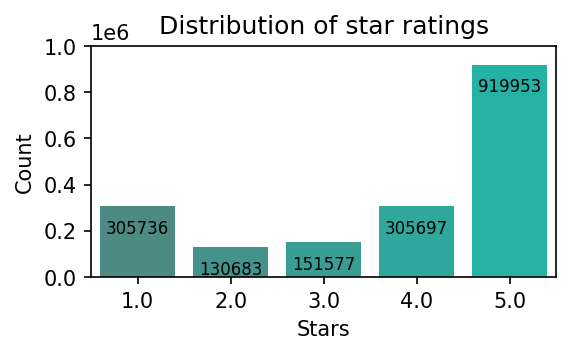

In [22]:
ax = sns.countplot(data=df, x='stars', palette=palette, zorder=2)
plt.title('Distribution of star ratings')
plt.ylim(0, 1000000)
plt.xlabel('Stars')
plt.ylabel('Count')
plt.bar_label(ax.containers[0], padding=-15, fontsize=8);

we can see, that our dataset is strongly biased towards good reviews. more then half of the reviews are 5 star reviews.

### Let's have a look at the length of the text reviews in realtion to the star distribution

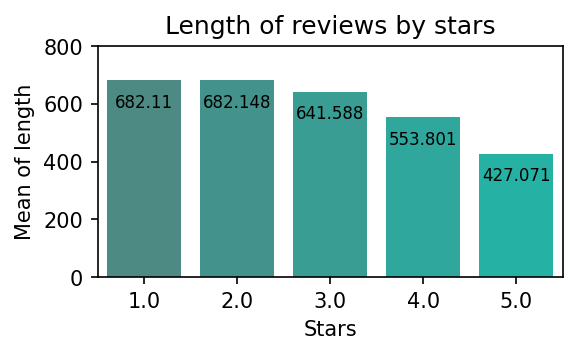

In [21]:
ax = sns.barplot(data=df, x='stars', y='length', errorbar=None, palette=palette)
plt.title('Length of reviews by stars')
plt.ylim(0, 800)
plt.xlabel('Stars')
plt.ylabel('Mean of length')
plt.bar_label(ax.containers[0], padding=-15, fontsize=8);

In [14]:
con = ax.containers
print(con)

[<BarContainer object of 5 artists>]


We can see, that reviews with higher star-rating seem to have shorter text. This does make sense, as a bad review often tends to explain the reasoning behind the bad rating.

### Finally let's see, if there is a raltion between the rating and if a review was clicked as useful

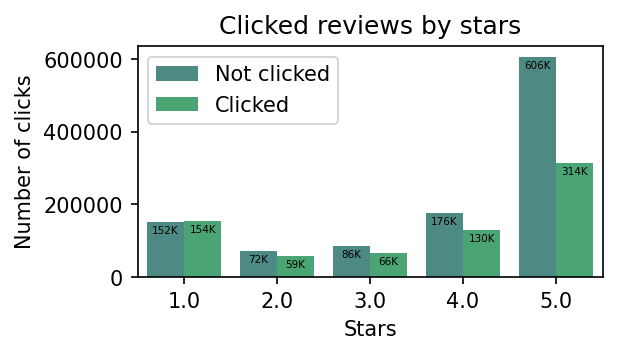

In [15]:
ax = sns.countplot(data=df, x='stars', hue='clicked', palette=hue_palette)
plt.title('Clicked reviews by stars')
plt.xlabel('Stars')
plt.ylabel('Number of clicks')
plt.legend(['Not clicked', 'Clicked'])
for p in ax.patches:
    ax.annotate(format(p.get_height()/1000, '.0f')+'K',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                size=5,
                xytext = (0, -4), 
                textcoords = 'offset points'
                )

We can see that especially the bad reviews are clicked more often then not, which also seems logic, as people tend to be interested in good explanations, as to why a place is considered bad.

## Okay, now that we got a first impression of the star rating, let's have a look at usefulness, as this will finally be the target of our model

Have a look at the number of reviews that were clicked as useful

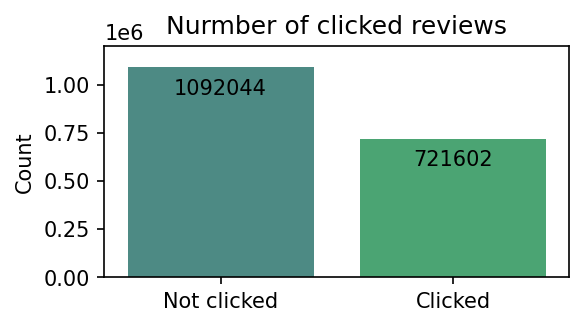

In [16]:
ax = sns.countplot(data=df, x='clicked', palette=hue_palette, zorder=2)
plt.title('Nurmber of clicked reviews')
plt.ylim(0, 1200000)
plt.xlabel('')
plt.ylabel('Count')
plt.xticks([0, 1], labels=['Not clicked', 'Clicked'])
plt.bar_label(ax.containers[0], fmt='%.0f', padding=-15);

We can see, that more reviews havn't been clicked, than there are that have been clicked, but the relation isn't too disparate

Now we can have alook whether the length of the review changes something

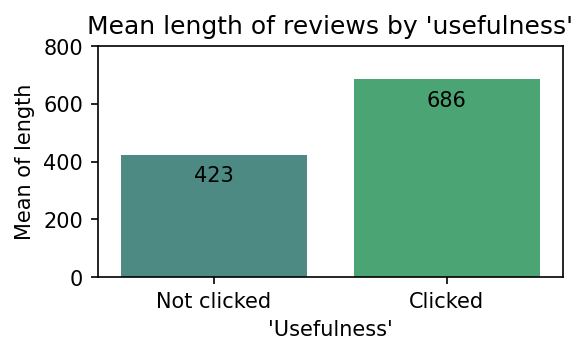

In [17]:
ax = sns.barplot(data=df, x='clicked', y='length', errorbar=None, palette=hue_palette)
plt.title("Mean length of reviews by 'usefulness'")
plt.ylim(0, 800)
plt.xlabel("'Usefulness'")
plt.ylabel('Mean of length')
plt.xticks([0, 1], labels=['Not clicked', 'Clicked'])
plt.bar_label(ax.containers[0], fmt='%.0f', padding=-15);

We can clearly see, that longer reviews are more often clicked as useful